<a href="https://colab.research.google.com/github/Sylva-gif/Licences-LUS/blob/main/Prediction_House_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Importation des Bibliothèques
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
#  Chargement de données
df = pd.read_csv("/content/house_prices_practice.csv")
df.head()

,Id,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,YearBuilt,FullBath,BedroomAbvGr,LotArea,SalePrice
0,1,7,1560,0,1658,1969,2,1,8059,177106
1,2,4,2827,2,1319,2012,3,4,13530,301044
2,3,8,3920,0,841,2010,1,4,9010,360609
3,4,5,3044,0,1058,1998,0,4,13207,240556
4,5,7,801,1,2428,2020,0,1,9117,193656


In [7]:
# Visualisation approfondie et preparation des données
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,300.0,150.500000,86.746758,1.0,75.75,150.5,225.25,300.0
OverallQual,300.0,5.326667,2.873001,1.0,3.00,5.0,8.00,10.0
GrLivArea,300.0,2307.386667,1042.561303,504.0,1392.25,2265.5,3306.50,3998.0
GarageCars,300.0,1.330000,1.109898,0.0,0.00,1.0,2.00,3.0
TotalBsmtSF,300.0,1468.796667,672.333705,303.0,903.00,1502.0,2129.50,2492.0
YearBuilt,300.0,1986.163333,21.377089,1950.0,1967.00,1986.0,2004.25,2023.0
FullBath,300.0,1.523333,1.131543,0.0,0.00,2.0,3.00,3.0
BedroomAbvGr,300.0,2.926667,1.456604,1.0,2.00,3.0,4.00,5.0
LotArea,300.0,8969.453333,3753.531132,2009.0,5996.25,9031.0,12316.00,14987.0
SalePrice,300.0,252262.903333,74998.055214,82494.0,190355.25,251292.5,307105.00,435291.0


In [8]:
df.isnull().sum()

,0
Id,0
OverallQual,0
GrLivArea,0
GarageCars,0
TotalBsmtSF,0
YearBuilt,0
FullBath,0
BedroomAbvGr,0
LotArea,0
SalePrice,0


In [6]:
df.columns

Index(['Id', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF',
       'YearBuilt', 'FullBath', 'BedroomAbvGr', 'LotArea', 'SalePrice'],
      dtype='object')

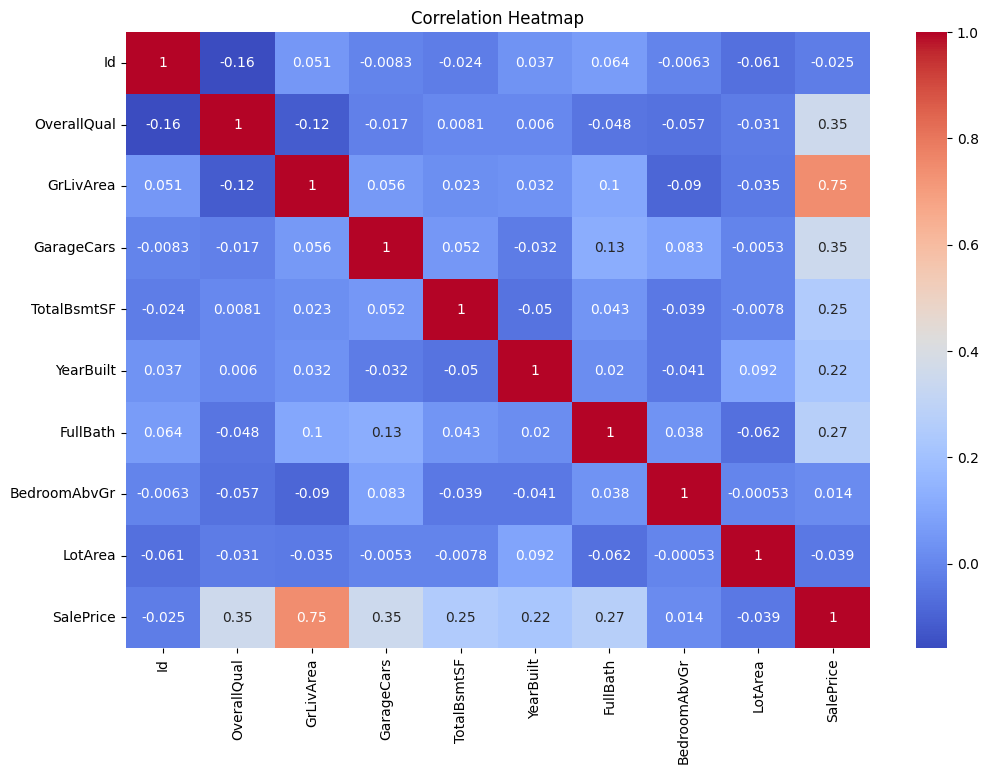

In [9]:
#Visulisation de la correlation entre les caracteristiques avec heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

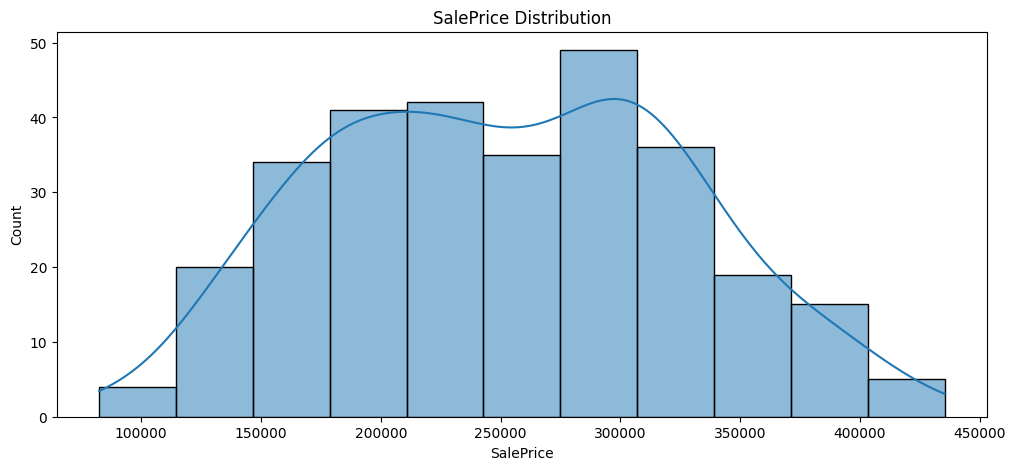

In [10]:
plt.figure(figsize=(12,5))
sns.histplot(df["SalePrice"], kde=True)
plt.title("SalePrice Distribution")
plt.show()

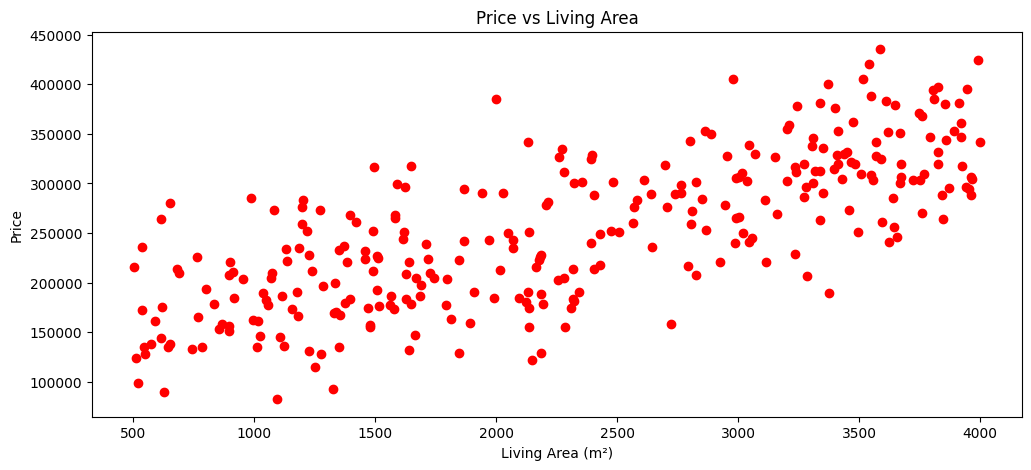

In [13]:
plt.figure(figsize=(12,5))
plt.scatter(df['GrLivArea'], df['SalePrice'] , color='red')
plt.title('Price vs Living Area')
plt.xlabel('Living Area (m²)')
plt.ylabel('Price')
plt.show()

In [21]:
# Preaparation des caractéristiques et des features
df["HouseAge"] = 2026 - df["YearBuilt"]
df.head()

,Id,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,YearBuilt,FullBath,BedroomAbvGr,LotArea,SalePrice,HouseAge
0,1,7,1560,0,1658,1969,2,1,8059,177106,57
1,2,4,2827,2,1319,2012,3,4,13530,301044,14
2,3,8,3920,0,841,2010,1,4,9010,360609,16
3,4,5,3044,0,1058,1998,0,4,13207,240556,28
4,5,7,801,1,2428,2020,0,1,9117,193656,6


In [11]:
X = df.drop(["SalePrice", "Id"], axis=1)
y = df["SalePrice"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
Lr = LinearRegression()
Lr.fit(X_train, y_train)

y_pred_Lr = Lr.predict(X_test)

print("Linear Regression R2:", r2_score(y_test, y_pred_Lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_Lr)))

Linear Regression R2: 0.9724369952260797
RMSE: 12505.459264619512


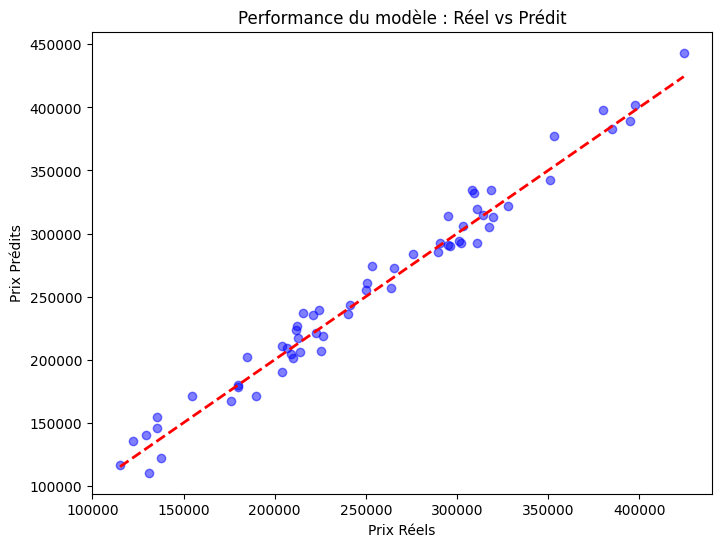

In [25]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_Lr, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Prix Réels')
plt.ylabel('Prix Prédits')
plt.title('Performance du modèle : Réel vs Prédit')
plt.show()

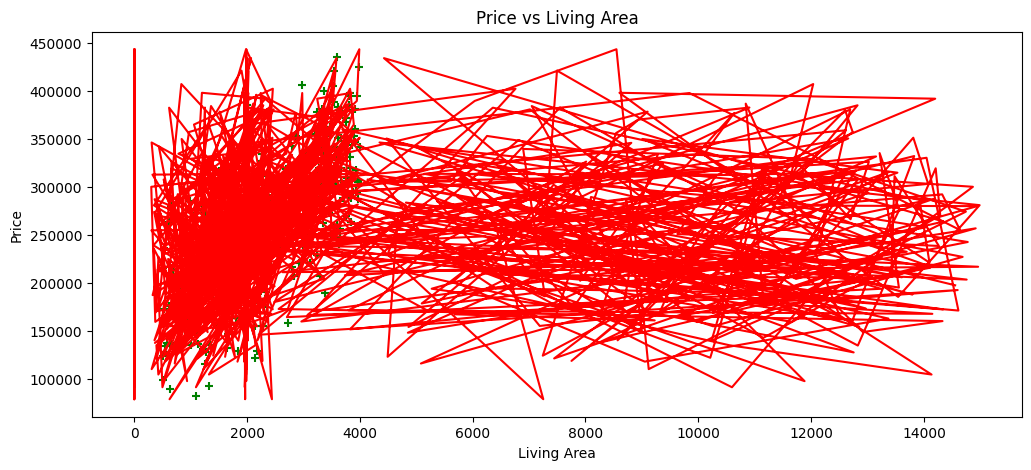

In [29]:
y_predR = Lr.predict(X)
plt.figure(figsize=(12,5))
plt.scatter(df['GrLivArea'], df['SalePrice'] , color='green',marker='+')
plt.plot(X, y_predR, color='red', label='Ligne de régression')
plt.title('Price vs Living Area')
plt.xlabel('Living Area')
plt.ylabel('Price')
plt.show()